In [26]:
%load_ext autoreload
%autoreload 2

import os
os.environ['CUDA_VISIBLE_DEVICES'] = ''


import crepe_melody
import tensorflow as tf

if tf.test.gpu_device_name():
    print('GPU found')
else:
    print("No GPU found")


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
No GPU found


In [27]:
argv = "--capacity_multiplier 8 --context_width 466 --multiresolution_convolution 6 --logdir ../experimenty/crepe/FINAL/multiresolution/0227_130211-crepe-dmdb,orchset-bs32-apw1-fw93-cw466-s16000-inTrue-lr0.0002-cm8-cg0.0-llw0.0-mc6-bps5-as0.25/ --checkpoint model.ckpt"
# argv = "--capacity_multiplier 8 --context_width 466 --multiresolution_convolution 6 --logdir ../experimenty/crepe/FINAL/negranularni_vystup/0305_211402-crepe-dmdb-bs32-apw1-hsNone-fw93-cw466-s16000-inTrue-lr0.0002-cm8-cg0.0-llw0.0-mc0-bps5-as0.25-mw1.0-vsFalse-flc1"

# argv = "--epochs 3 --datasets orchset --capacity_multiplier 8  --context_width 4050 --bins_per_semitone 5 --annotation_smoothing 0.25 --logdir models/0227_045758-crepe-dmdb,orchset-bs32-apw1-fw93-cw4050-s16000-inTrue-lr0.0002-cm8-cg0.0-llw0.0-mc0-bps5-as0.25"
argv = argv.split()
args = crepe_melody.parse_args(argv)
# Construct the network
network, train_dataset, validation_datasets, test_datasets = crepe_melody.construct(args)


dataset id: mdb
dataset duration: 102.78 minutes
dataset examples: 1062322
max. polyphony: 1

dataset id: mdb
dataset duration: 50.91 minutes
dataset examples: 526235
max. polyphony: 1

dataset id: mdb
dataset duration: 1.03 minutes
dataset examples: 10679
max. polyphony: 1

dataset id: mdb
dataset duration: 183.52 minutes
dataset examples: 1896944
max. polyphony: 1

datasets ready in 3.16s
(?, 256, 40) 512
(?, 256, 40) 256
(?, 256, 40) 128
(?, 256, 40) 64
(?, 256, 40) 32
(?, 256, 40) 16
INFO:tensorflow:Summary name conv1d/kernel:0 is illegal; using conv1d/kernel_0 instead.
INFO:tensorflow:Summary name batch_normalization/gamma:0 is illegal; using batch_normalization/gamma_0 instead.
INFO:tensorflow:Summary name batch_normalization/beta:0 is illegal; using batch_normalization/beta_0 instead.
INFO:tensorflow:Summary name conv1d_1/kernel:0 is illegal; using conv1d_1/kernel_0 instead.
INFO:tensorflow:Summary name batch_normalization_1/gamma:0 is illegal; using batch_normalization_1/gamma_

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
with network.session.graph.as_default(), network.session.as_default():
    trainable = tf.trainable_variables()
    first = trainable[3].eval()
    
    vyber = np.array([x.eval() for x in trainable[0:18:3]])
    #print(vyber)
    print(len(vyber), vyber[2].shape[2])
    filters = vyber[0].shape[2]
    fig, axs = plt.subplots(filters*2, len(vyber), figsize=(18,80), facecolor='white', gridspec_kw = {'width_ratios':[512, 256, 128, 64, 32, 16]})
    plt.ylim(-0.3, 0.3)
    print(axs.shape)
    for x in range(axs.shape[1]): # 0..5
        for y in range(filters): # 0..39
            axs[2*y,x].set_xticklabels([])
            axs[2*y,x].set_yticklabels([])
            X = vyber[x][:,0,y]
            axs[2*y,x].plot(X)
            axs[2*y,x].plot(np.abs(np.fft.fft(X)))
    plt.tight_layout()

6 40
(80, 6)


1 40
(40, 1)


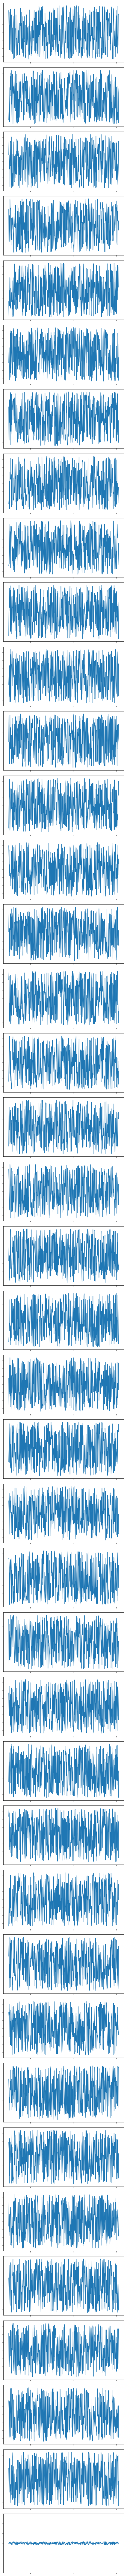

In [10]:
with network.session.graph.as_default(), network.session.as_default():
    trainable = tf.trainable_variables()
    first = trainable[0].eval()
    
    vyber = np.array([first])
    print(len(vyber), vyber[0].shape[2])
    fig, axs = plt.subplots(vyber[0].shape[2], len(vyber), figsize=(6,120), facecolor='white', squeeze=False)
    plt.ylim(-0.3, 0.3)
    print(axs.shape)
    for x in range(axs.shape[1]): # 0..5
        for y in range(axs.shape[0]): # 0..39
            axs[y,x].set_xticklabels([])
            axs[y,x].set_yticklabels([])
            axs[y,x].plot(vyber[x][:,0,y])
    plt.tight_layout()